### Report to 11020PHYS401200-Computational-Physics

### Part A : Build Transfer Matrix Directly

* Author : Yen-Tung Lin
* ID : 109022802

### Reference
* Complexity and Criticality, Kim Christensen

### Model

* Classical Ising Model in 1/2 D : E = J $\sum_{<i,j>}S^{z}_{i}S^{z}_{j}$


### To Calculate

* Transfer Matrix
* Corrlation length $\xi$=$\frac{1}{\log(\lambda_{0}/\lambda_{1})}$

### Import

In [1]:
import os
import math
import random
import cytnx as cy
from scipy.optimize import curve_fit
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

## Solving 1D Ising Model throuh Transfer Matrix Method

### Exact vs Numerical 

#### Exact Solution
* $\lambda_+ = \exp{\beta J}*\{\cosh(\beta B) + \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [3]:
def lamda_p(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) + math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

* $\lambda_- = \exp{\beta J}*\{\cosh(\beta B) - \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [4]:
def lamda_n(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) - math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

### Transfer Matrix
* $T = \begin{pmatrix} \exp{\beta (J+B)}&\exp{\beta (-JB)}\\\exp{\beta (JB)}&\exp{\beta (J-B)} \end{pmatrix}$


In [5]:
def T(temperature, J, B):
    beta = 1/temperature
    return np.array([[math.exp(beta*(J+B)),math.exp(-beta*(J))],[math.exp(-beta*(J)),math.exp(beta*(J-B))]])

### Plot of Eigenvalue ( Exact vs Numerical )

[]

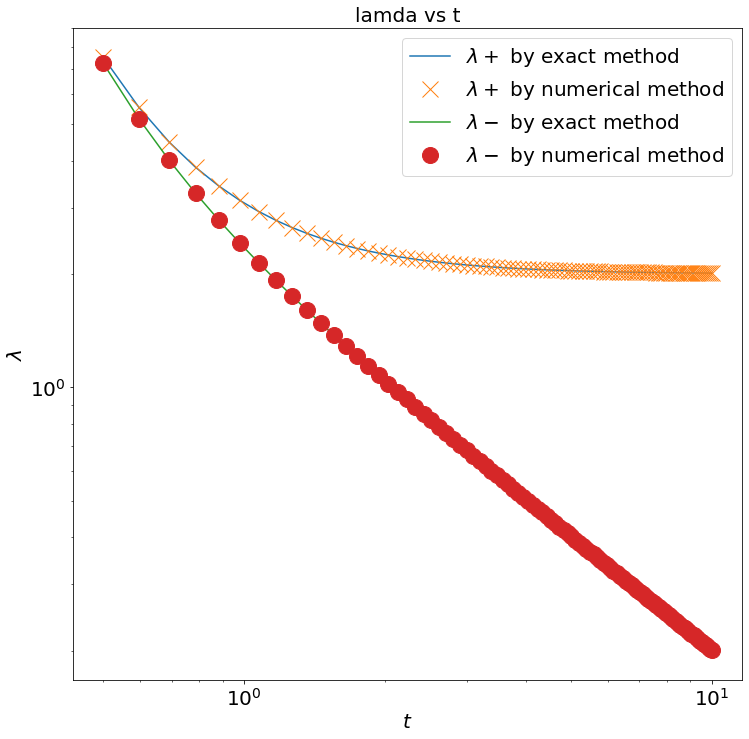

In [10]:
temperature = np.linspace(0.5,10,100)
lambda_p_numerical = []
lambda_n_numerical = []
for t in temperature:
    eigcvle, eigfn = np.linalg.eig(T(t, 1, 0))
    lambda_p_numerical.append(eigcvle[0])
    lambda_n_numerical.append(eigcvle[1])


plt.figure(figsize=(12,12))
plt.title("lamda vs t", fontsize=20)
y=[lamda_p(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda+$ by exact method")
plt.plot(temperature, lambda_p_numerical, 'x', label = "$\lambda+$ by numerical method" ,markersize=16)
y=[lamda_n(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda-$ by exact method")
plt.plot(temperature, lambda_n_numerical, 'o', label = "$\lambda-$ by numerical method" ,markersize=16)
plt.legend(loc="best",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$t$",fontsize=20)
plt.ylabel("$\lambda$", fontsize=20)
plt.loglog()

## 2D Ising Model through transfer Matrix Method

### Transfer Matrix

In [11]:
def twoD(temperature, J, B):
    beta = 1/temperature
    
    V1 = np.zeros((4,4))

    V1[0,0] = math.exp( 4*beta*J + 2*beta*B )
    V1[0,1] = math.exp( beta*B )
    V1[0,2] = math.exp( beta*B )
    V1[0,3] = 1
    V1[1,0] = math.exp( beta*B )
    V1[1,1] = 1
    V1[1,2] = math.exp( -4*beta*J)
    V1[1,3] = math.exp( -beta*B )
    V1[2,0] = math.exp( beta*B )
    V1[2,1] = math.exp( -4*beta*J)
    V1[2,2] = 1
    V1[2,3] = math.exp( -beta*B )
    V1[3,0] = 1
    V1[3,1] = math.exp( -beta*B )
    V1[3,2] = math.exp( -beta*B )
    V1[3,3] = math.exp( 4*beta*J - 2*beta*B )
    return V1

### Plot of eigenvalues of 2D ising By Exact Diagonalization of transfer matrix

[]

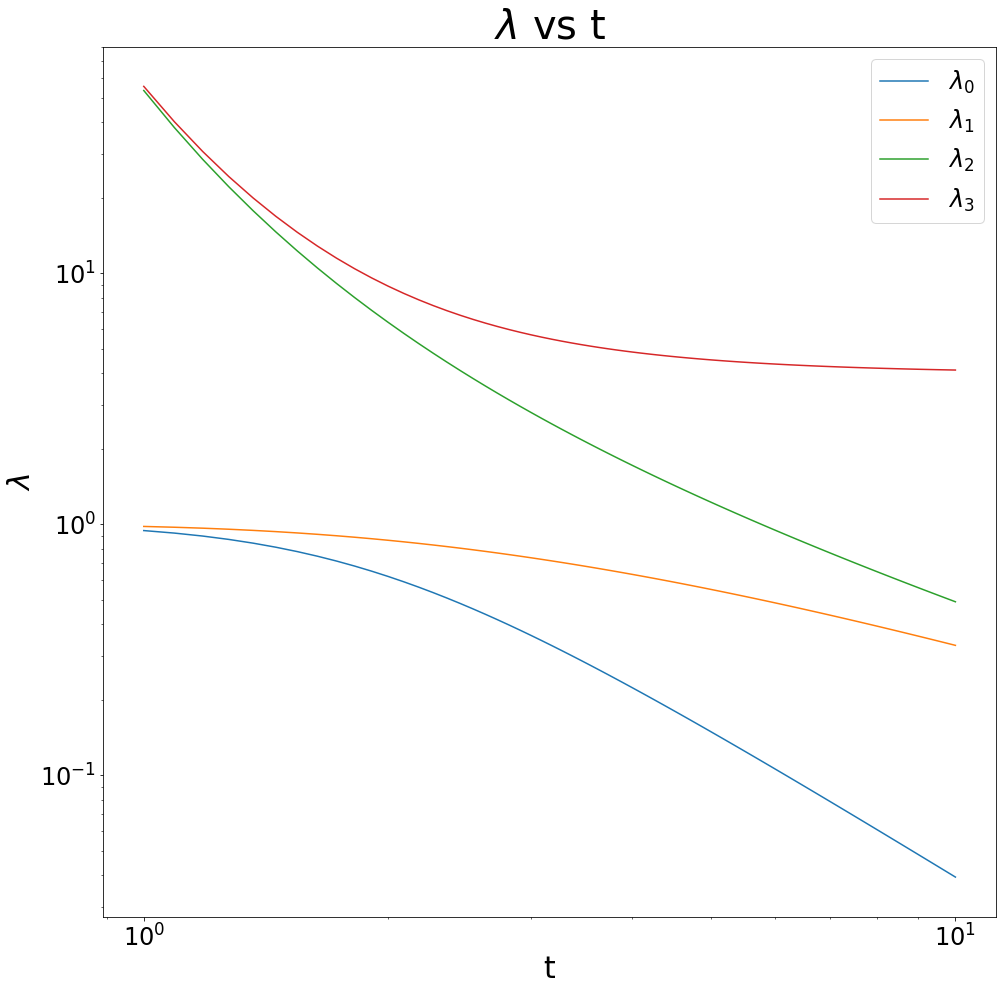

In [14]:
plt.figure(figsize=(16,16))
plt.title("$\lambda$ vs t",fontsize=40)
temperature = np.linspace(1,10,100)
y=[ np.linalg.eigvalsh(twoD(i,1,0))[0] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_0$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[1] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_1$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[2] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_2$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[3] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_3$")
plt.xlabel("t",fontsize=30)
plt.ylabel("$\lambda$",fontsize=30)
plt.legend(loc="best",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.loglog()

### Correlation Lenght of $L_y$=1 and $L_y$=2

#### Corr length( L=1 ) = $\frac{1}{2\ln{\lambda_{3}/\lambda_{2}}}$
#### Corr length( L=2 ) = $\frac{1}{\ln{\lambda_{1}/\lambda_{0}}}$

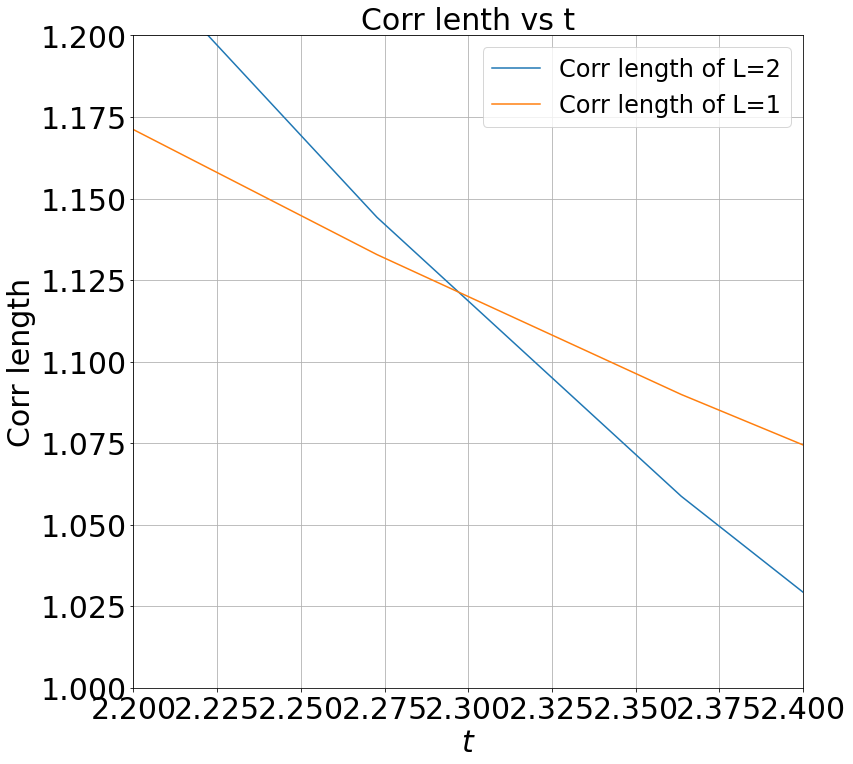

In [9]:
temperature = np.linspace(1,10,100)
xi = [ 1/np.log(np.linalg.eigvalsh(twoD(i,1,0))[3]/np.linalg.eigvalsh(twoD(i,1,0))[2])/2 for i in temperature]
plt.figure(figsize=(12,12))
plt.title("Corr lenth vs t", fontsize=30)
plt.plot(temperature, xi, label = "Corr length of L=2" )
xi = [ 1/np.log(np.linalg.eigvalsh(T(i,1,0))[1]/np.linalg.eigvalsh(T(i,1,0))[0]) for i in temperature]
plt.plot(temperature, xi, label = "Corr length of L=1" )
plt.legend(loc="best",fontsize=24)
plt.xlim(2.2,2.4)
plt.ylim(1,1.2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("$t$",fontsize=30)
plt.ylabel("Corr length", fontsize=30)
# plt.loglog()
plt.grid()
plt.show()